<h1 style="background-color:Green;font-size:36pt;color:white">Simple linear regression</h1>

## Giusseppe Benito Bervis Quintero
### León, Nicaragua - 2022

# Importing needed packages

In [41]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# Uploading packages for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot']) # optional: for ggplot-like style

import pylab as pl # convenient for interactive calculations and plotting

from sklearn import linear_model # To model data
from sklearn.metrics import r2_score # To perform evaluation

# Downloading Data

To download the data, we will use !wget to download it from IBM Object Storage.

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')

# Take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Understanding the Data

FuelConsumption.csv:
We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

The features are:
*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

# Looking at some relations

Some relations between features should be importants, in this case we can put our attention on:
number of cylinder, enginesize, fuel consumption, all these, vs. the $CO_2$ emissions. For this purpose, we can take a look at the plot of these relations.

In [4]:
# Taking out the needed features
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

# Take a look at the new dataset
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


## Engine Size vs. CO2 Emissions

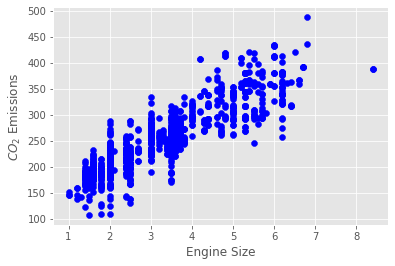

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Engine Size')
plt.ylabel('$CO_2$ Emissions')
plt.show()

## Cylinders vs. CO2 Emissions

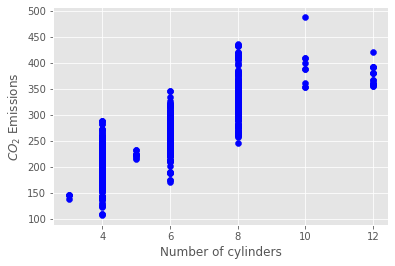

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Number of cylinders')
plt.ylabel('$CO_2$ Emissions')
plt.show()

## Fuel Consumption vs. CO2 Emissions

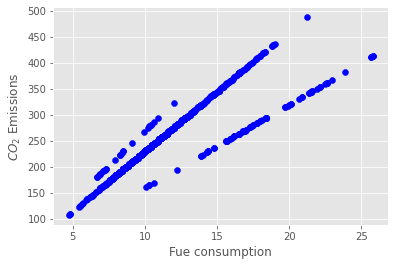

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('Fue consumption')
plt.ylabel('$CO_2$ Emissions')
plt.show()

# Simple linear regresion model

## Engine size vs. CO2 emissions

Function: 38.6958516339776*x + 126.5401554490779


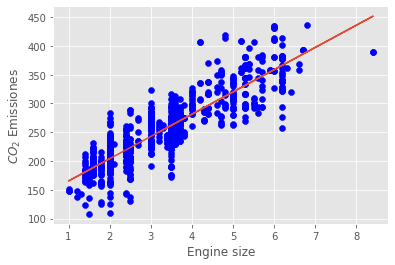

Mean absolute error: 22.92
Residual sum of squares (MSE): 913.06
R2-score: 0.76


In [77]:
# Splitting the data into train and test sets
# Taking 80% as trainning set
random_sample = np.random.rand(len(df)) < 0.8
train = cdf[random_sample]
test = cdf[random_sample]

# Making an object fron clase linear regression
regr = linear_model.LinearRegression()

# Performing Linear Regression
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# Printing the function
print(f'Function: {regr.coef_[0][0]}*x + {regr.intercept_[0]}')

# Plotting points and the linear function
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-')
plt.xlabel('Engine size')
plt.ylabel('$CO_2$ Emissiones')
plt.show()

# Performing some metrics to evluate the regression model
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print(f'Mean absolute error: {np.mean(np.absolute(test_y_ - test_y)) :.2f}') # :.2f is to print only two positional decimals
print(f'Residual sum of squares (MSE): {np.mean((test_y_ - test_y) ** 2) :.2f}')
print(f'R2-score: {r2_score(test_y , test_y_) :.2f}')

## Fuel Consumption vs. CO2 emissions

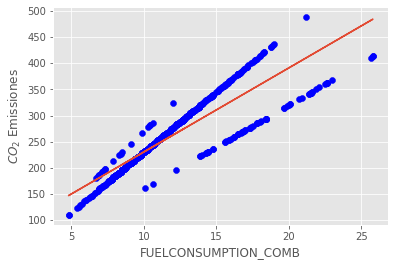

Mean absolute error: 20.54
Residual sum of squares (MSE): 819.31
R2-score: 0.79


In [74]:
train_x = np.array(train[['FUELCONSUMPTION_COMB']])
train_y = np.array(train[['CO2EMISSIONS']])

regr = linear_model.LinearRegression()

# Performing Linear Regression
regr.fit(train_x, train_y)

# Plotting points and the linear function
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('$CO_2$ Emissiones')
plt.show()

# Finding predictions using the model
test_x = np.array(test[['FUELCONSUMPTION_COMB']])
test_y = np.array(test[['CO2EMISSIONS']])
predictions = regr.predict(test_x)

# Performing Mean Absolute Error value
print(f'Mean absolute error: {np.mean(np.absolute(predictions - test_y)) :.2f}') # :.2f is to print only two positional decimals
print(f'Residual sum of squares (MSE): {np.mean((predictions - test_y) ** 2) :.2f}')
print(f'R2-score: {r2_score(test_y , predictions) :.2f}')